In [1]:
import mlflow

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os, sys
sys.path.append(os.path.abspath('..'))  # adds the parent directory
from src import data_processing

In [4]:
df = pd.read_csv('..\\data\\raw\\data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
# drop column
df.drop(columns=['CurrencyCode', 'CountryCode' ], inplace=True) 
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [7]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [8]:
df.shape

(95662, 14)

In [9]:
from src.data_processing import TransactionFeatureExtractor

In [ ]:
# Feature extraction
tfe = TransactionFeatureExtractor(
    datetime_col='TransactionStartTime',   # 🟢 your actual datetime column
    amount_col='Amount',                   # 🟢 update if needed
    customer_id_col='CustomerId'          # 🟢 update if needed
)

df_transformed = tfe.fit_transform(df)

In [11]:
df_transformed.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,...,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,...,2,0,2,15,11,2018,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,...,2,0,2,15,11,2018,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,...,2,0,2,15,11,2018,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,...,2,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,...,2,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610


In [12]:
df_transformed.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year', 'total_transaction_amount',
       'average_transaction_amount', 'transaction_count',
       'std_transaction_amount'],
      dtype='object')

In [31]:
df_transformed['CustomerId']

0        CustomerId_4406
1        CustomerId_4406
2        CustomerId_4683
3         CustomerId_988
4         CustomerId_988
              ...       
95657    CustomerId_3078
95658    CustomerId_3874
95659    CustomerId_3874
95660    CustomerId_1709
95661    CustomerId_1709
Name: CustomerId, Length: 95662, dtype: object

In [13]:
# select categorical columns with low cardinality
col_list = ['ChannelId' , 'ProductCategory' , 'ProviderId' ]

In [14]:
from src.data_processing import drop_columns

In [15]:
df_transformed.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year', 'total_transaction_amount',
       'average_transaction_amount', 'transaction_count',
       'std_transaction_amount'],
      dtype='object')

# Proxy Target Variable Engineering

In [16]:
df_transformed.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'transaction_hour', 'transaction_day', 'transaction_month',
       'transaction_year', 'total_transaction_amount',
       'average_transaction_amount', 'transaction_count',
       'std_transaction_amount'],
      dtype='object')

In [17]:
from src.data_processing import create_proxy_target

In [18]:
df_with_proxy = create_proxy_target(df_transformed)
df_with_proxy.head()

,TransactionId,BatchId,AccountId,SubscriptionId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,...,transaction_day,transaction_month,transaction_year,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,Recency,Frequency,Monetary
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,...,15,11,2018,109921.75,923.712185,119,3042.294251,1,119,109921.75
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,...,15,11,2018,109921.75,923.712185,119,3042.294251,1,119,109921.75
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,...,15,11,2018,1000.00,500.000000,2,0.000000,82,2,1000.00
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,...,15,11,2018,228727.20,6019.136842,38,17169.241610,6,38,228727.20
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,...,15,11,2018,228727.20,6019.136842,38,17169.241610,6,38,228727.20


In [19]:
df_with_proxy.drop(columns=['TransactionId', 'BatchId', 'AccountId','SubscriptionId' ] , inplace=True)
df_with_proxy.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,Recency,Frequency,Monetary
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,2,15,11,2018,109921.75,923.712185,119,3042.294251,1,119,109921.75
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,2,15,11,2018,109921.75,923.712185,119,3042.294251,1,119,109921.75
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,2,15,11,2018,1000.00,500.000000,2,0.000000,82,2,1000.00
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610,6,38,228727.20
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610,6,38,228727.20


In [32]:
df_with_proxy['CustomerId'] = df['CustomerId'].values  # if rows are still aligned

rfm = df_with_proxy[['CustomerId', 'Recency', 'Frequency', 'Monetary']].drop_duplicates('CustomerId')


### Preprocess RFM Features (Scaling)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled

array([[-1.1233968 ,  0.96408198, -0.02275205],
       [ 1.86384564, -0.24314093, -0.06284189],
       [-0.93899912,  0.12831228,  0.02097559],
       ...,
       [-1.1233968 , -0.22250464, -0.06082933],
       [-1.1233968 , -0.25345907, -0.06136964],
       [-1.1233968 , -0.25345907, -0.06247382]], shape=(3742, 3))

In [23]:
# Cluster Customers Using K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()

,CustomerId,Recency,Frequency,Monetary,Cluster
0,CustomerId_4406,1,119,109921.75,1
2,CustomerId_4683,82,2,1000.00,0
3,CustomerId_988,6,38,228727.20,1
5,CustomerId_1432,91,1,2000.00,0
6,CustomerId_2858,6,29,93400.00,1


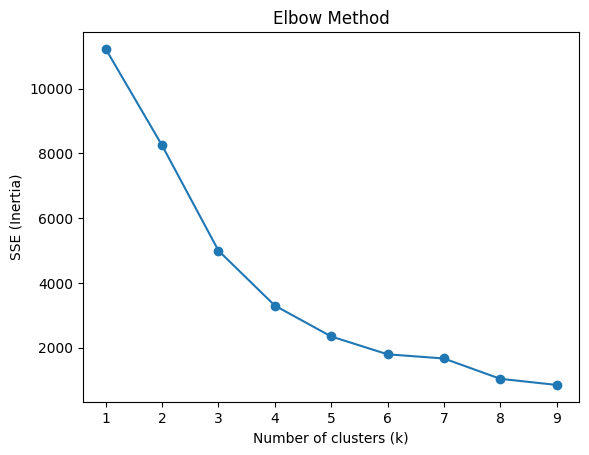

In [ ]:
import matplotlib.pyplot as plt
sse = []

for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method")
plt.show()

In [ ]:
# Analyze the Clusters
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_profile)

# Choose high-risk cluster based on low Frequency and low Monetary
high_risk_cluster = cluster_profile['Frequency'].idxmin()

           Recency    Frequency      Monetary
Cluster                                      
0        61.877279     7.720196  8.172068e+04
1        12.726566    34.800000  2.725741e+05
2        29.000000  4091.000000 -1.049000e+08


In [26]:
# Assign the is_high_risk Label
rfm['is_high_risk'] = (rfm['Cluster'] == high_risk_cluster).astype(int)
rfm.head()

,CustomerId,Recency,Frequency,Monetary,Cluster,is_high_risk
0,CustomerId_4406,1,119,109921.75,1,0
2,CustomerId_4683,82,2,1000.00,0,1
3,CustomerId_988,6,38,228727.20,1,0
5,CustomerId_1432,91,1,2000.00,0,1
6,CustomerId_2858,6,29,93400.00,1,0


In [27]:
df_final = df_with_proxy.merge(rfm[['CustomerId', 'is_high_risk']], on='CustomerId', how='left')
df_final.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,transaction_hour,transaction_day,...,transaction_year,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,Recency,Frequency,Monetary,CustomerId,is_high_risk
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,2,15,...,2018,109921.75,923.712185,119,3042.294251,1,119,109921.75,CustomerId_4406,0
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,2,15,...,2018,109921.75,923.712185,119,3042.294251,1,119,109921.75,CustomerId_4406,0
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,2,15,...,2018,1000.00,500.000000,2,0.000000,82,2,1000.00,CustomerId_4683,1
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0,3,15,...,2018,228727.20,6019.136842,38,17169.241610,6,38,228727.20,CustomerId_988,0
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,3,15,...,2018,228727.20,6019.136842,38,17169.241610,6,38,228727.20,CustomerId_988,0


In [33]:
df_final.drop(columns=['CustomerId'], inplace=True  )

In [35]:
df_final.to_csv('..\\data\\processed\\data_cleaned.csv', index=False)